<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_mod2/blob/main/Core4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Carga y Exploración de Datos:

- Cargar el dataset y revisar su estructura básica.
- Describir las variables y su distribución.
- Identificar y tratar valores nulos y outliers.

In [22]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1


In [11]:
data = pd.read_csv(os.path.join(path, "WineQT.csv"))
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


## Según ChatGPT, estos serían valores comunes

- Ácido fijo (fixed acidity): Este valor debería ser positivo, ya que el ácido fijo en el vino es una propiedad química real. Valores cercanos a 0 podrían indicar problemas en los datos, aunque no es imposible.

- Ácido volátil (volatile acidity): El ácido volátil también debería ser positivo, pero en muchos casos es bajo. Un valor de 0 no necesariamente sería erróneo, pero sí inusual.

- Ácido cítrico (citric acid): Este valor normalmente es bajo en la mayoría de los vinos. Un valor de 0 no sería raro, ya que algunos vinos contienen cantidades muy pequeñas de ácido cítrico.

- Azúcar residual (residual sugar): Este valor normalmente es mayor que 0, pero en vinos secos, puede ser bajo (e incluso 0 en algunos casos).

- Dióxido de azufre libre (free sulfur dioxide) y dióxido de azufre total (total sulfur dioxide): Estos valores son críticos para la conservación del vino y deben ser positivos. Sin embargo, algunos vinos tienen niveles muy bajos de dióxido de azufre, por lo que un valor de 0 no sería raro, aunque un valor de 0 en dióxido de azufre total podría indicar un vino con poca protección contra el deterioro.

- pH: El pH del vino generalmente se encuentra entre 2.9 y 4.0. Un valor fuera de este rango podría indicar un error en los datos.

- Alcohol: Los niveles de alcohol en el vino generalmente varían entre 8 y 15%. Un valor de 0 sería inusual, ya que el alcohol es una característica fundamental del vino.

- Calidad (quality): Este valor debería estar en un rango de 0 a 10, ya que se refiere a la puntuación del vino. Un valor fuera de este rango sería un error.

- Density (Densidad): 0.990 - 1.000
- Sulphates (Sulfatos): 0.3 - 0.7 g/L
- Chlorides (Cloruros): 0.01 - 0.1 g/L

In [14]:
# Para obtener el valor mínimo
min_values = data.min()

# Para obtener el valor máximo
max_values = data.max()

# Si deseas ver ambos juntos en un DataFrame:
min_max_values = pd.DataFrame({'min': min_values, 'max': max_values})
print(min_max_values)
#todo está dentro de lo esperado, algunos outliers

                          min         max
fixed acidity         4.60000    15.90000
volatile acidity      0.12000     1.58000
citric acid           0.00000     1.00000
residual sugar        0.90000    15.50000
chlorides             0.01200     0.61100
free sulfur dioxide   1.00000    68.00000
total sulfur dioxide  6.00000   289.00000
density               0.99007     1.00369
pH                    2.74000     4.01000
sulphates             0.33000     2.00000
alcohol               8.40000    14.90000
quality               3.00000     8.00000
Id                    0.00000  1597.00000


In [12]:
data.info()
#al parecer no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


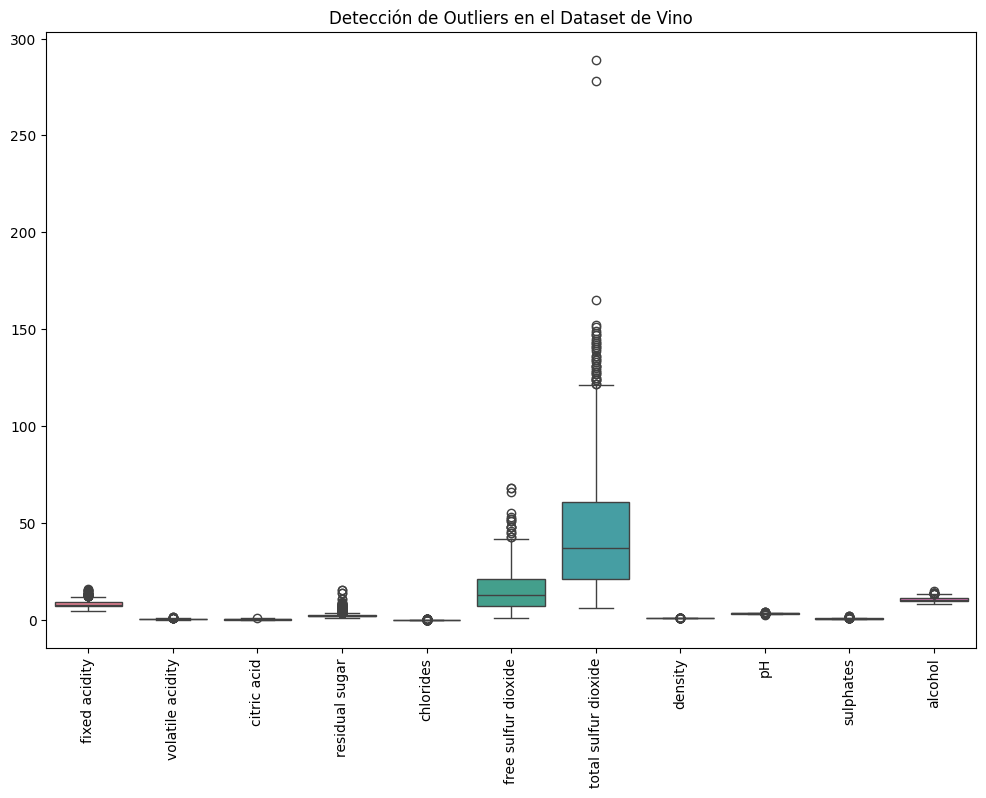

In [17]:
# Crear un gráfico de caja (boxplot) para detectar outliers en todas las columnas numéricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['quality', 'Id']))  # Excluir 'quality' y 'Id' de los outliers
plt.title("Detección de Outliers en el Dataset de Vino")
plt.xticks(rotation=90)  # Rotar etiquetas de las columnas
plt.show()

algunos valores atípicos pueden ser significativos dependiendo del contexto del vino por lo que no voy a cambiar nada

 2. Preprocesamiento de Datos:

- Seleccionar características importantes para la clasificación.
- Transformar variables categóricas en variables numéricas si es necesario.
- Dividir los datos en conjuntos de entrenamiento y prueba.
- Escalar las características.

In [18]:
# elimino id
data = data.drop(columns=['Id'])

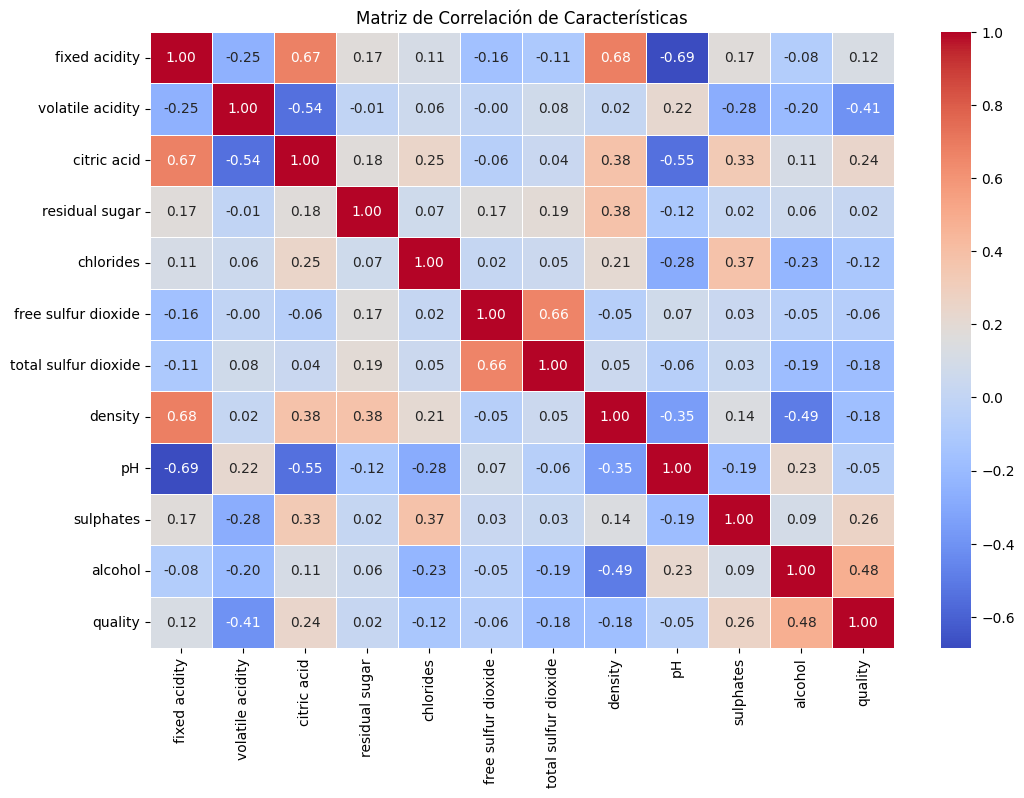

In [19]:
correlation_matrix = data.corr()

# Crear el gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Características')
plt.show()

### buscando la correlación con quality, usamos las siguientes columnas:
alcohol, citric acid, sulphates, fixed acidity

In [21]:
# Seleccionar las características que vamos a usar
features = ['alcohol', 'citric acid', 'sulphates', 'fixed acidity']
X = data[features]  # Características
y = data['quality']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

Conjunto de entrenamiento: (914, 4)
Conjunto de prueba: (229, 4)


In [23]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Mostrar los primeros valores escalados
print("Datos de entrenamiento escalados (primeras filas):")
print(X_train_scaled[:5])

Datos de entrenamiento escalados (primeras filas):
[[ 0.05661327  1.5096933   0.56821234  0.1426802 ]
 [ 0.89445566  1.5096933   0.4477703   0.96843134]
 [ 1.26683005  0.4833938   0.20688622  0.3786091 ]
 [-0.50194833 -1.1586854  -0.57598704 -0.97798208]
 [-1.24669712 -0.08107092 -0.51576602 -0.38815983]]


 3. Entrenamiento de Modelos de Clasificación:

- Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, - RandomForest, y Regresión Logística).
- Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

In [25]:
# 1. K-Nearest Neighbors (KNN)
print("Entrenando modelo KNN...")
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
print("Mejores parámetros KNN:", knn_grid.best_params_)
print("Mejor puntuación KNN:", knn_grid.best_score_)

Entrenando modelo KNN...
Mejores parámetros KNN: {'n_neighbors': 9, 'weights': 'distance'}
Mejor puntuación KNN: 0.6093616765747913


In [26]:
# 2. Random Forest
print("\nEntrenando modelo Random Forest...")
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
print("Mejores parámetros Random Forest:", rf_grid.best_params_)
print("Mejor puntuación Random Forest:", rf_grid.best_score_)


Entrenando modelo Random Forest...
Mejores parámetros Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntuación Random Forest: 0.6235813366960908


In [27]:
# 3. Regresión Logística
print("\nEntrenando modelo de Regresión Logística...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train)
print("Mejores parámetros Regresión Logística:", lr_grid.best_params_)
print("Mejor puntuación Regresión Logística:", lr_grid.best_score_)


Entrenando modelo de Regresión Logística...
Mejores parámetros Regresión Logística: {'C': 1, 'penalty': 'l2'}
Mejor puntuación Regresión Logística: 0.5645349186332792


In [28]:
# Evaluación final en el conjunto de prueba para cada modelo
print("\nEvaluación en conjunto de prueba:")
models = {'KNN': knn_grid.best_estimator_, 'Random Forest': rf_grid.best_estimator_, 'Regresión Logística': lr_grid.best_estimator_}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\nModelo: {name}")
    print(classification_report(y_test, y_pred))


Evaluación en conjunto de prueba:

Modelo: KNN
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.76      0.73        96
           6       0.68      0.70      0.69        99
           7       0.68      0.65      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229


Modelo: Random Forest
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.75      0.71        96
           6       0.64      0.65      0.64        99
           7       0.74      0.65      0.69        26
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.41      0.41      0.41       229
weight

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

 4. Evaluación de Modelos:

- Evaluar los modelos utilizando métricas como exactitud, precisión, recall, - F1-Score y matriz de confusión.
- Generar un informe de clasificación para cada modelo.
- Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

In [30]:
# 1. Evaluación de modelos
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("Exactitud:", accuracy_score(y_test, y_pred))
    print("Precisión:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\nInforme de Clasificación:")
    print(classification_report(y_test, y_pred))
    return y_pred

In [31]:
# Evaluar cada modelo
mejores_modelos = {
    "KNN": knn_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_,
    "Regresión Logística": lr_grid.best_estimator_
}

print("\nEvaluación de Modelos:")
for nombre, modelo in mejores_modelos.items():
    print(f"\nModelo: {nombre}")
    evaluar_modelo(modelo, X_test_scaled, y_test)


Evaluación de Modelos:

Modelo: KNN
Exactitud: 0.6943231441048034
Precisión: 0.6696615647065194
Recall: 0.6943231441048034
F1-Score: 0.6815523761456482

Matriz de Confusión:
[[ 0  3  3  0  0]
 [ 0 73 22  1  0]
 [ 0 25 69  5  0]
 [ 0  2  7 17  0]
 [ 0  0  0  2  0]]

Informe de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.76      0.73        96
           6       0.68      0.70      0.69        99
           7       0.68      0.65      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229


Modelo: Random Forest
Exactitud: 0.6681222707423581
Precisión: 0.6453490763063717
Recall: 0.6681222707423581
F1-Score: 0.6556980430160962

Matriz de Confusión:
[[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 30 64  5  0]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-35-9a80dcd88e91>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Línea diagonal


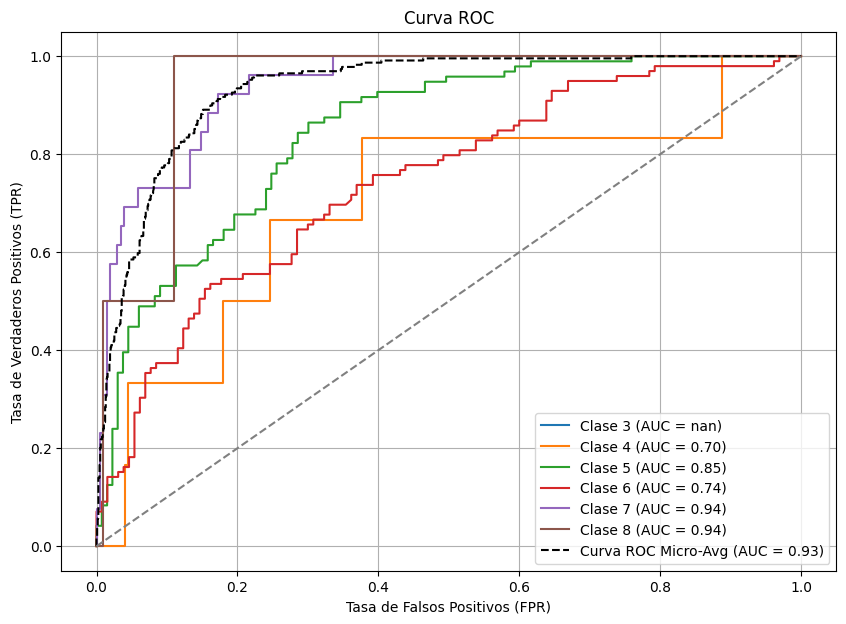

In [35]:
# Aseguramos consistencia en las clases
clases_totales = np.unique(y)
y_bin = label_binarize(y_test, classes=clases_totales)
n_classes = y_bin.shape[1]

# Calcular FPR, TPR y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Curva ROC promedio (micro-ROC)
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Visualización
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {clases_totales[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label=f'Curva ROC Micro-Avg (AUC = {roc_auc["micro"]:.2f})', linestyle='--', color='black')
plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Entre los modelos evaluados, el KNN y el Random Forest presentan un rendimiento similar, con una ligera ventaja del KNN en cuanto a métricas globales como la exactitud (0.694 vs. 0.668).
El KNN destaca especialmente en el equilibrio entre precisión y recall en las clases con mayor representación (clase 5 y clase 6), lo que lo hace adecuado en este contexto de clases desbalanceadas. Sin embargo, el Random Forest muestra mayor capacidad para captar patrones en la clase 7, gracias a su enfoque basado en múltiples árboles.